In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()


In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
X, y = make_blobs(n_samples=600, centers=5,
                  cluster_std=0.60, random_state=42)

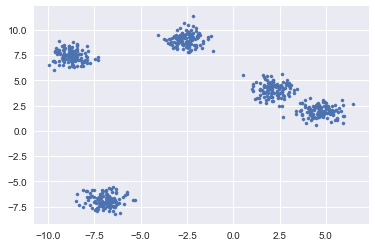

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=10);

In [5]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

In [6]:
distance = linkage(X, 'ward')

# Dendrogram

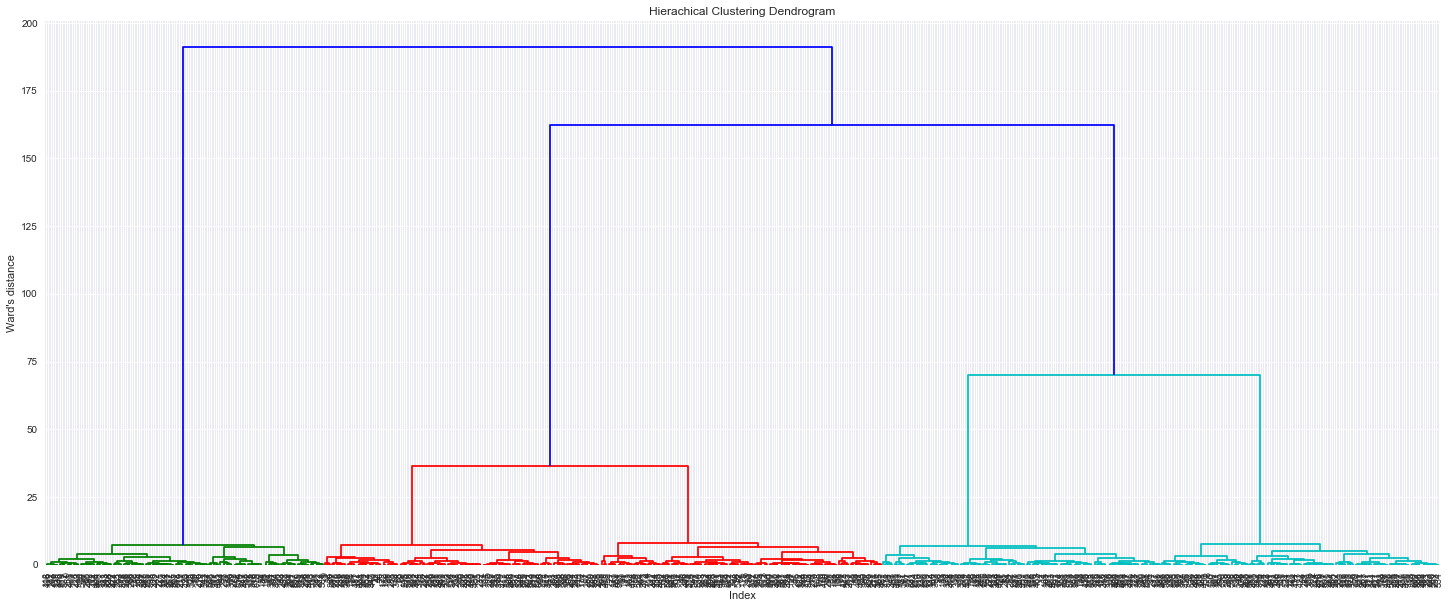

In [7]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);


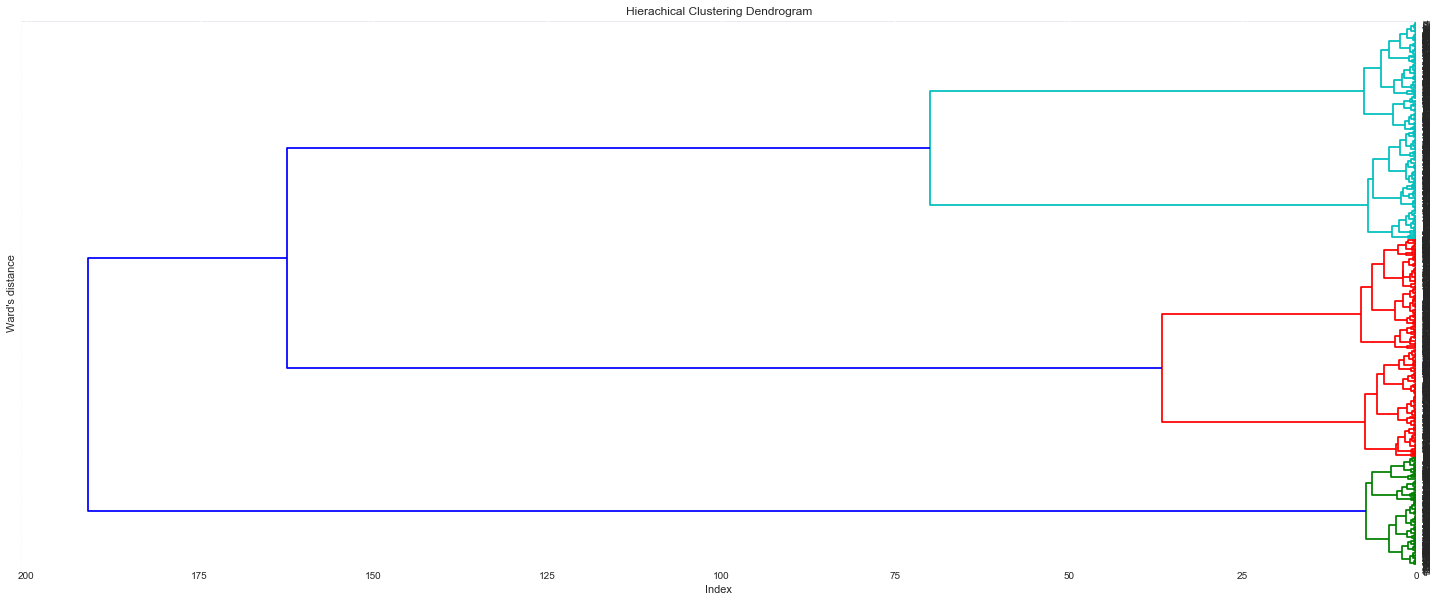

In [8]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance, orientation="left",
           leaf_rotation=90.,
           leaf_font_size=9.,);


# Truncanting Dedogram

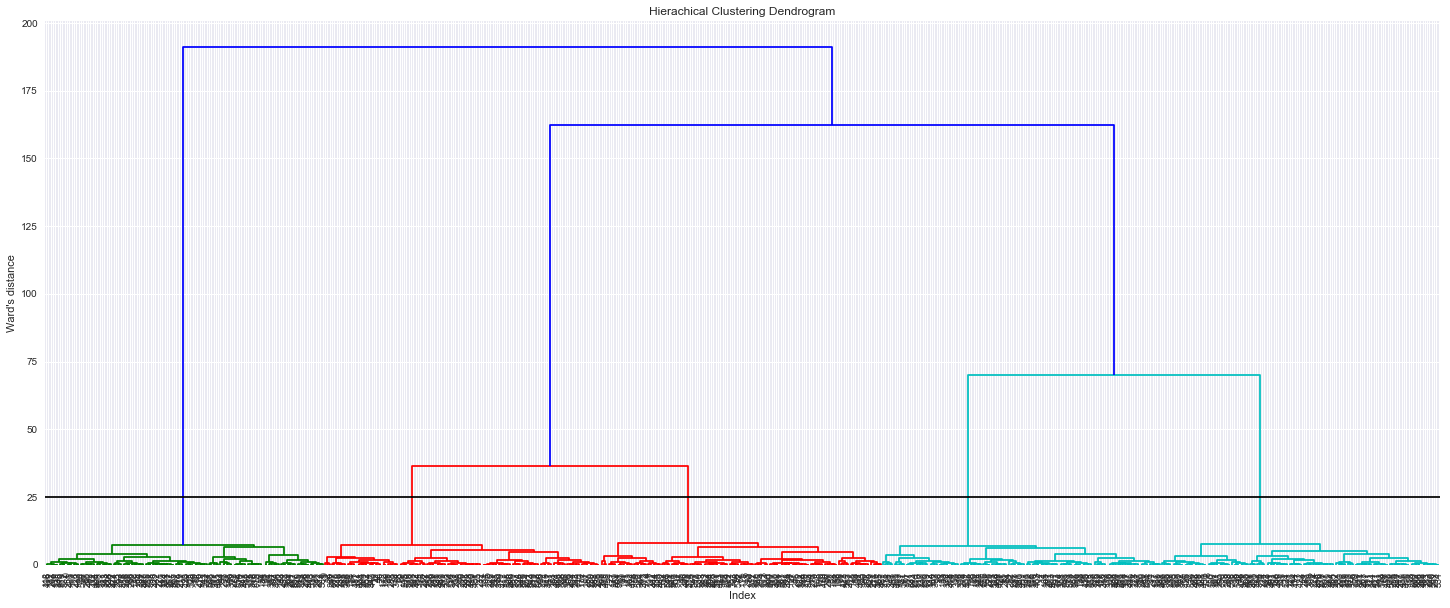

In [9]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);
plt.axhline(25, c='k');

In [10]:
from scipy.cluster.hierarchy import fcluster
max_d = 25
clusters = fcluster(distance, max_d, criterion='distance')
clusters

array([1, 1, 5, 3, 3, 2, 3, 4, 5, 2, 1, 5, 2, 4, 4, 1, 4, 3, 5, 3, 4, 3,
       2, 5, 5, 2, 2, 3, 3, 3, 1, 4, 5, 1, 1, 3, 2, 2, 1, 4, 3, 2, 2, 1,
       1, 2, 2, 3, 5, 3, 4, 2, 1, 2, 4, 3, 4, 1, 1, 3, 2, 4, 1, 4, 3, 2,
       1, 3, 2, 2, 5, 3, 1, 3, 5, 1, 4, 5, 1, 5, 3, 1, 1, 3, 3, 4, 3, 1,
       5, 5, 5, 1, 4, 4, 2, 2, 4, 4, 3, 1, 3, 5, 4, 5, 5, 1, 3, 4, 3, 4,
       4, 5, 4, 3, 5, 2, 5, 4, 1, 1, 5, 5, 3, 3, 2, 4, 4, 4, 5, 2, 2, 1,
       1, 4, 3, 4, 2, 2, 2, 1, 5, 2, 2, 1, 4, 5, 4, 1, 2, 1, 5, 2, 1, 4,
       1, 4, 2, 3, 5, 5, 3, 3, 3, 4, 2, 4, 4, 3, 4, 1, 2, 2, 2, 4, 4, 3,
       2, 3, 4, 3, 2, 5, 3, 1, 1, 2, 4, 2, 5, 5, 2, 3, 4, 3, 1, 2, 5, 3,
       4, 2, 5, 4, 3, 5, 3, 5, 1, 1, 2, 2, 3, 3, 2, 3, 4, 1, 1, 5, 4, 2,
       2, 1, 5, 2, 5, 4, 1, 4, 3, 5, 2, 4, 2, 5, 3, 1, 1, 4, 4, 5, 4, 2,
       1, 3, 1, 3, 3, 4, 2, 2, 2, 1, 4, 5, 2, 3, 5, 1, 2, 2, 2, 4, 3, 1,
       3, 5, 1, 4, 4, 2, 2, 2, 1, 2, 3, 1, 3, 4, 5, 1, 5, 4, 5, 4, 4, 1,
       5, 2, 2, 3, 1, 1, 2, 1, 1, 5, 1, 3, 5, 4, 4,

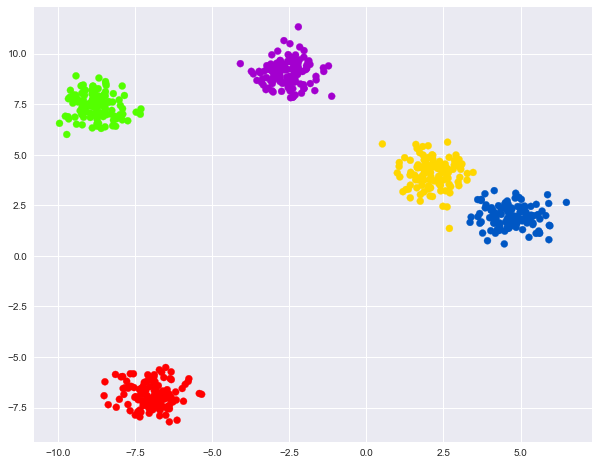

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism');

# By clusters

In [12]:
k = 5
clusters = fcluster(distance, k, criterion='maxclust')

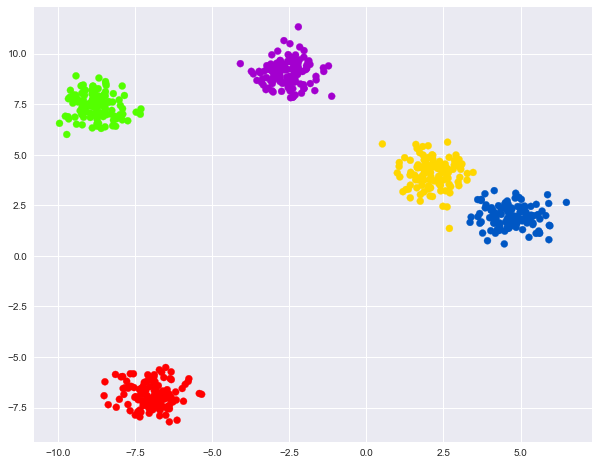

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism');

# K-Mean Clustering

In [14]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
y_kmeans = kmeans.predict(X)

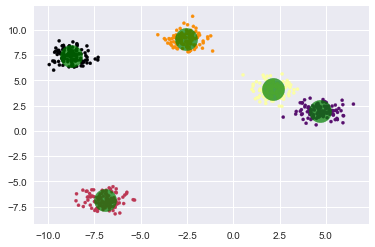

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=500, alpha=0.7);

# ELBOW Method

In [29]:
kmeans.inertia_

414.4338493499473

In [35]:
sse_ = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])

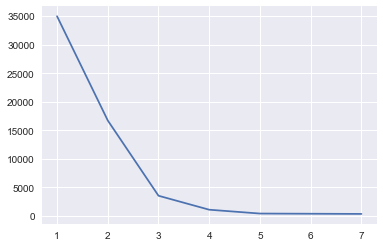

In [36]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

# Sihouette Analysis

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

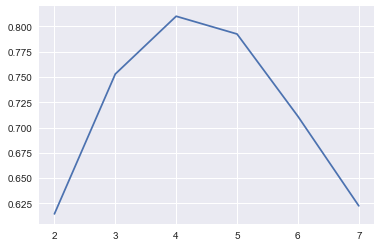

In [39]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

# Mean Shift 

In [40]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [41]:
from itertools import cycle

In [42]:
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [43]:
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=0.9946702350329211, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [44]:
cluster_centers = meanshift_model.cluster_centers_

In [45]:
print('\nCenters of clusters: \n', cluster_centers)


Centers of clusters: 
 [[-2.6733  8.9994]
 [ 4.6837  1.9518]
 [-8.789   7.4687]
 [ 2.2375  4.1844]
 [-6.9235 -7.0323]]


In [46]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('\nNumber of clusters in input data =', num_clusters)


Number of clusters in input data = 5


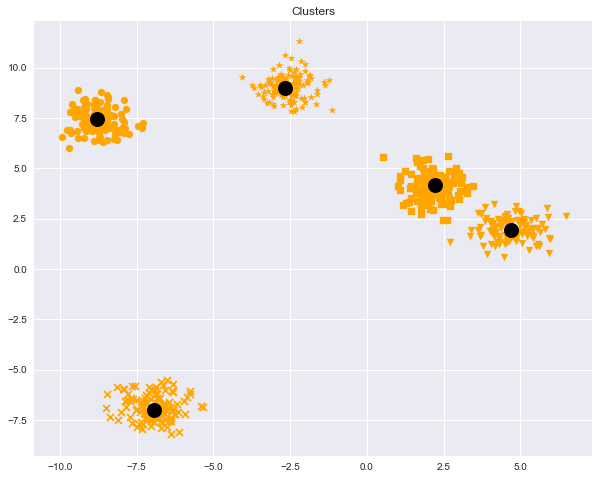

In [47]:
plt.figure(figsize=(10,8))
markers = '*vosx'
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='orange')
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',  
             markerfacecolor='black', markeredgecolor='black',  
             markersize=15) 
plt.title('Clusters');